In [41]:
import pandas as pd

In [42]:
import matplotlib.pyplot as plt
import requests
import yfinance as yf

In [43]:
my_series = pd.Series(['a', 'b', 'c', 'd'])
print(my_series)

0    a
1    b
2    c
3    d
dtype: object


In [44]:
ticker_data = [45.06, 167.32, 372.90, 41.36]
tickers = ['WFC', 'JPM', 'GS', 'BOA']
ticker_series = pd.Series(ticker_data, index=tickers, name='Ticker Data')
print(ticker_series)

WFC     45.06
JPM    167.32
GS     372.90
BOA     41.36
Name: Ticker Data, dtype: float64


In [45]:
my_stock_price = ticker_series['JPM']
print(my_stock_price)

167.32


In [46]:
df = pd.read_csv('https://datahub.io/core/cpi/r/cpi.csv')
#Note that if the data we wish to access is stored locally, replace the link with the filepath
print(df)

     Country Name Country Code  Year         CPI
0     Afghanistan          AFG  2004   63.131893
1     Afghanistan          AFG  2005   71.140974
2     Afghanistan          AFG  2006   76.302178
3     Afghanistan          AFG  2007   82.774807
4     Afghanistan          AFG  2008  108.066600
...           ...          ...   ...         ...
6931       Zambia          ZMB  2010  100.000000
6932       Zambia          ZMB  2011  106.429397
6933       Zambia          ZMB  2012  113.428087
6934       Zambia          ZMB  2013  121.342732
6935       Zambia          ZMB  2014  130.821971

[6936 rows x 4 columns]


In [47]:
cpi_rows = df[:4]
print(cpi_rows)

  Country Name Country Code  Year        CPI
0  Afghanistan          AFG  2004  63.131893
1  Afghanistan          AFG  2005  71.140974
2  Afghanistan          AFG  2006  76.302178
3  Afghanistan          AFG  2007  82.774807


In [48]:
cpi_columns = df[['Country Name', 'CPI']]
print(cpi_columns)

     Country Name         CPI
0     Afghanistan   63.131893
1     Afghanistan   71.140974
2     Afghanistan   76.302178
3     Afghanistan   82.774807
4     Afghanistan  108.066600
...           ...         ...
6931       Zambia  100.000000
6932       Zambia  106.429397
6933       Zambia  113.428087
6934       Zambia  121.342732
6935       Zambia  130.821971

[6936 rows x 2 columns]


In [49]:
zambia_df = df[['Country Name', 'CPI', 'Year']][6934:6936]
print(zambia_df)

     Country Name         CPI  Year
6934       Zambia  121.342732  2013
6935       Zambia  130.821971  2014


In [50]:
target_cpi = df.iloc[0,3]
print(target_cpi)

63.1318927309003


In [51]:
target_cpi = df.loc[0, 'CPI']
print(target_cpi)

63.1318927309003


In [52]:
no_countrycode = df.drop(columns=['Country Code'])
print(no_countrycode)

     Country Name  Year         CPI
0     Afghanistan  2004   63.131893
1     Afghanistan  2005   71.140974
2     Afghanistan  2006   76.302178
3     Afghanistan  2007   82.774807
4     Afghanistan  2008  108.066600
...           ...   ...         ...
6931       Zambia  2010  100.000000
6932       Zambia  2011  106.429397
6933       Zambia  2012  113.428087
6934       Zambia  2013  121.342732
6935       Zambia  2014  130.821971

[6936 rows x 3 columns]


In [53]:
rm_afganistan_data = df.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print(rm_afganistan_data)

     Country Name Country Code  Year         CPI
11        Albania          ALB  1991    5.115616
12        Albania          ALB  1992   16.677187
13        Albania          ALB  1993   30.853588
14        Albania          ALB  1994   37.815716
15        Albania          ALB  1995   40.762778
...           ...          ...   ...         ...
6931       Zambia          ZMB  2010  100.000000
6932       Zambia          ZMB  2011  106.429397
6933       Zambia          ZMB  2012  113.428087
6934       Zambia          ZMB  2013  121.342732
6935       Zambia          ZMB  2014  130.821971

[6925 rows x 4 columns]


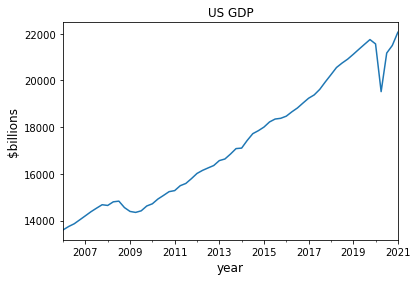

In [54]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1947-01-01&coed=2021-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2021-06-14&revision_date=2021-06-14&nd=1947-01-01'

data = pd.read_csv(url, index_col=0, parse_dates=True)

ax = data['2006':].plot(title='US GDP', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('$billions', fontsize=12)
plt.show()

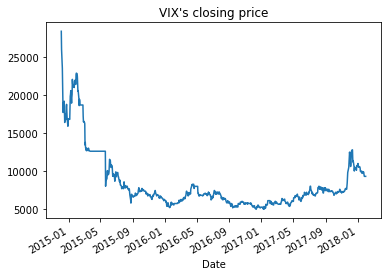

In [56]:
ticker = yf.Ticker('VIX')
vix_df = ticker.history(period="max")
vix_df['Close'].plot(title="VIX's closing price")
plt.show()